In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# https://computinglife.wordpress.com/2008/11/20/why-do-hash-functions-use-prime-numbers/

In [2]:
def h(x, alpha=7, p=31):
    sum_counter = 0
    for idx, x_ in enumerate(x):
        sum_counter += x_ * alpha**idx
    return sum_counter % p

In [9]:
x_list = [np.random.choice(range(0, 26), 6) for i in range(0, 1000)]

In [12]:
print(len(x_list))
print(len(x_list[0]))

1000
6


In [13]:
x_list_transformed = [h(x) for x in x_list]

(array([ 85.,  97., 113., 100., 109.,  86.,  87., 100.,  91., 132.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

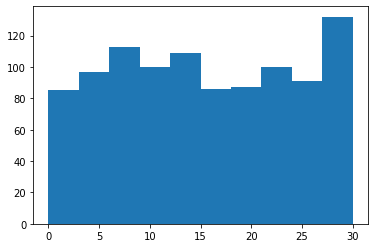

In [16]:
plt.hist(x_list_transformed)

In [17]:
x_list_transformed_2 = [h(x, p=32) for x in x_list]

(array([136., 100., 110.,  88., 103.,  78.,  88.,  86.,  93., 118.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <BarContainer object of 10 artists>)

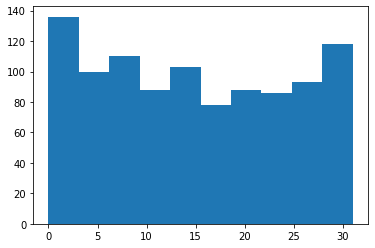

In [18]:
plt.hist(x_list_transformed_2)

In [31]:
from scipy.stats import ks_2samp

In [32]:
ks_2samp(x_list_transformed, x_list_transformed_2)

KstestResult(statistic=0.024, pvalue=0.9357699014782725)

In [33]:
def cdf(x):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return x, y
    

In [34]:
x, y = cdf(x_list_transformed)

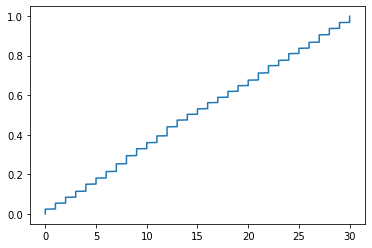

In [35]:
plt.plot(x, y)

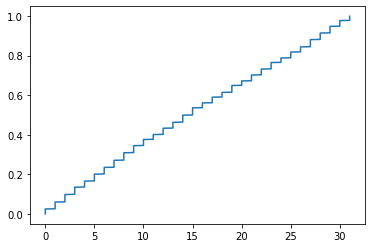

In [36]:
x, y = cdf(x_list_transformed_2)
plt.plot(x, y)

In [41]:
x_uniform = []
for i in range(0, 1000):
    x_uniform.extend([i for j in range(0, round(1000 / 32))])

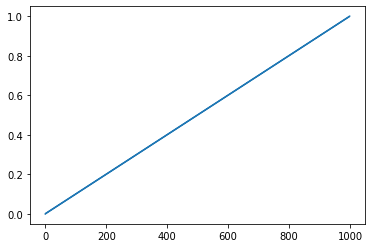

In [43]:
x, y = cdf(x_uniform)
plt.plot(x, y)

In [44]:
ks_2samp(x_uniform, x_list_transformed)

KstestResult(statistic=0.969, pvalue=0.0)

In [45]:
ks_2samp(x_uniform, x_list_transformed_2)

KstestResult(statistic=0.968, pvalue=0.0)

In [ ]:
a